In [31]:
#importing the dependencies
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns #plot graph in graphical manner
import matplotlib.pyplot as plt #to plot graph

Data Collection and Processing

In [2]:
#Loading the data to pandas Dataframe(Structure of Dataset)
heart_data=pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
#print First 5 Rows in the Dataset
heart_data.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [4]:
#Getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
#Number of Rows and Columns in the dataset
heart_data.shape

(270, 14)

In [6]:
#checking the missing values
heart_data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
#statiscal values about the data
heart_data.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

<Axes: xlabel='Heart Disease', ylabel='count'>

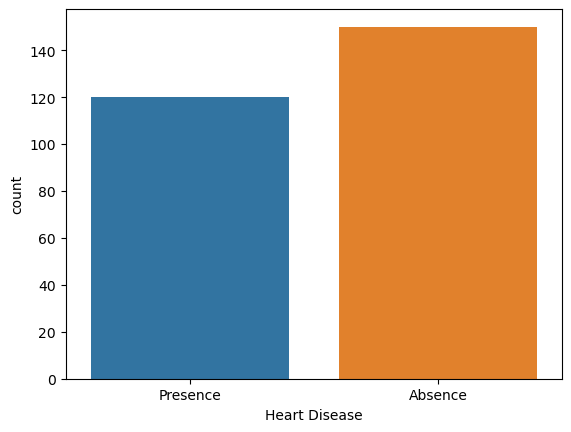

In [28]:
#Data Visualization
sns.countplot(x = 'Heart Disease',data = heart_data)

In [8]:
#checking the distribution of target variable
heart_data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

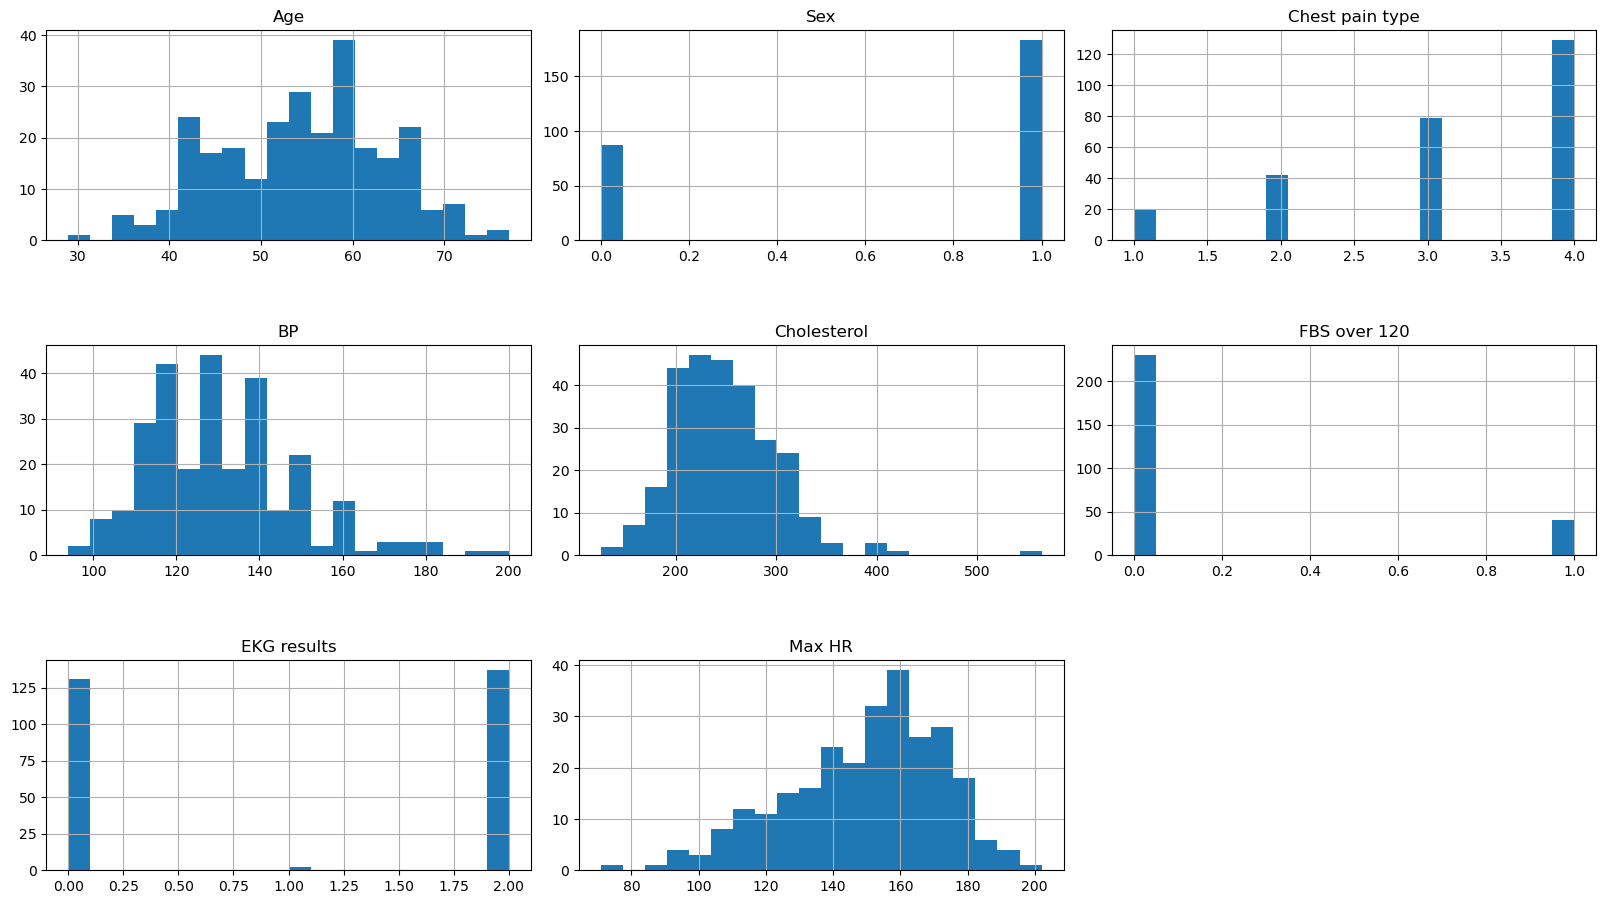

In [32]:
# Histogram of each feature
import itertools

col = heart_data.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(4, 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    heart_data[i].hist(bins = 20)
    plt.title(i)
plt.show()

Splitting the Features and Predict the Target

In [9]:
X=heart_data.drop(columns='Heart Disease',axis=1)
Y=heart_data['Heart Disease']

In [10]:
print(X)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [11]:
print(Y)

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object


Splitting the Data into Traing Data and Testing data

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [13]:
print(X.shape, X_train.shape,X_test.shape)

(270, 13) (189, 13) (81, 13)


MODEL TRAINING

In [14]:
#Logistic Regression
model= LogisticRegression()

In [15]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation
Accuracy Score

In [16]:
#Accuracy Score on Training Data

X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [17]:
print("Accuracy Score on Training Data:",training_data_accuracy )

Accuracy Score on Training Data: 0.8677248677248677


In [18]:
#Accuracy Score on Test Data

X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [19]:
print("Accuracy Score on Testing Data:",testing_data_accuracy )

Accuracy Score on Testing Data: 0.8518518518518519


##### Random Forest Algorithm

In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train.values.ravel())#train the data

RandomForestClassifier()

In [35]:
Y_pred_rf = model.predict(X_test)
print(Y_pred_rf)

['Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence' 'Absence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Presence' 'Presence'
 'Absence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Presence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Absence'
 'Absence' 'Presence' 'Absence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Presence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Presence' 'Presence' 'Absence' 'Presence'
 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Presence' 'Presence' 'Absence' 'Absence' 'Absence' 'Absence' 'Absence'
 'Absence' 'Absence' 'Presence' 'Presence' 'Presence' 'Presence']


In [ ]:
from sklearn.metrics import accuracy_score

In [36]:
acc1=accuracy_score(Y_test,Y_pred_rf)
print('The Accuracy Score for RF:',acc1)

The Accuracy Score for RF: 0.7777777777777778


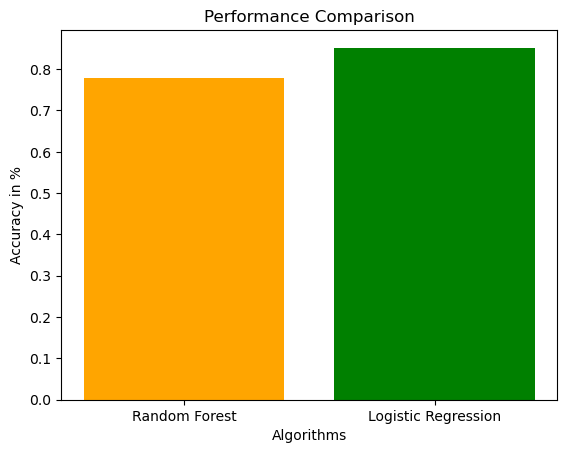

In [37]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1,2] 
  
# heights of bars 
height = [acc1,testing_data_accuracy] 
  
# labels for bars 
tick_label = ['Random Forest', 'Logistic Regression'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['orange', 'green']) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy in %') 
# plot title 
plt.title('Performance Comparison') 
  
# function to show the plot 
plt.show() 

In [20]:
inp_data=(70,1,4,130,322,0,2,109,0,2.4,2,3,3)

#Change the input data as array

inp_arr=np.array(inp_data)

#Reshape Array as we are predicting the only on instance

inp_data_reshape= inp_arr.reshape(1,-1)


In [21]:
pred_res=model.predict(inp_data_reshape)

In [22]:
print(pred_res)

['Presence']


In [23]:
if (pred_res=='Presence'):
    print("The User Have Heart Disease")
else:
    print("The User Have Healthy Heart")

The User Have Heart Disease


#### Saving the Trained Model

In [38]:
import pickle
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

### Loading the Saved Model

In [39]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [41]:
inp_data=(67,0,3,115,564,0,2,160,0,1.6,2,0,7)

#Change the input data as array

inp_arr=np.array(inp_data)

#Reshape Array as we are predicting the only on instance

inp_data_reshape= inp_arr.reshape(1,-1)

pred_res=model.predict(inp_data_reshape)

if (pred_res=='Presence'):
    print("The User Have Heart Disease")
else:
    print("The User Have Healthy Heart")

The User Have Healthy Heart
